In [12]:
#import system packages
import sys
import os
import warnings
#import scientific packages
import math
import pandas as pd
import numpy as np
import scipy as sc
from scipy.io import loadmat
import scipy.interpolate as sci
#import datetime
from datetime import date,datetime
import itertools
flatten = itertools.chain.from_iterable
#import own functions from utils.py
from utils import *
#import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline


In [8]:
# setup testing coefficients
coefB = 0.2; #coef determining beta (transmission rate)
coefG = 0.6; #coef determining gamma  (removal rate)
coefBrx = 0.2; #coef determining beta (transmission rate) relaxed after 3rd date
coefGrx = 0.2; #coef determining gamma (removal rate) relaxed after 3rd date

betaNode = [0.8,0.8,0.4,0.1];
gammaNode = [0.1,0.1,0.3,0.9];

# derive other coefficients
grid1 = [0.2, 1, 1.4];
grid2 = [1.4, 1, 0.2];
coefBamp = sci.CubicSpline(grid1, grid2, axis=0, bc_type='not-a-knot')(coefB).tolist() # Matlab's csapi uses the not-a-knot end condition
ctrBeta0 = 0.8;
if betaNode[-1]==0:
    ctrBeta =  coefBamp*0.5*(betaNode[-1]+betaNode[-2])
else:
    ctrBeta =  coefBamp*0.5*betaNode[-1]
ctrBeta = [ctrBeta,(ctrBeta0+coefBrx)*ctrBeta];

ctrGamma0 = 1.2;
ctrGamma = coefG*gammaNode[-1];
ctrGamma = [ctrGamma,(ctrGamma0-coefGrx)*ctrGamma] ; 



1.4


In [9]:
# setup testing coefficients for SEIR prediction function

RK = 1
N = 1000000
# simulate dates from 8/03/2020 to 13/04/2020
Dates = range(date.toordinal(date(2020,3,1)), date.toordinal(date(2020,4,13))+1)
StartDate = Dates[0]
DaysHistoryFromStart = 40 #this should be automatically extracted
EndDate0 = Dates[0] + DaysHistoryFromStart -1 # take this to be the last available date of the given data
DaysToPredict = 20
EndDate1 = EndDate0+DaysToPredict
t_step = 1
Nodes1 = [Dates[5], Dates[10]]
Nodes = list(flatten([[StartDate], Nodes1, [EndDate0]]) ); # this assumption may have to be changed
Sigma = 1/11.5;
E0 = 0; 
I0 = 5; #newly infected
R0 = 2;
S0 = N-I0-E0-R0; 
SPLINE = 'pchip' ; 

SetDates0 = [5,15,25]
SetDates1 = [x+EndDate0 for x in SetDates0]
Tbreak=SetDates1[0]

TimeSeries = range(StartDate,EndDate1+1)


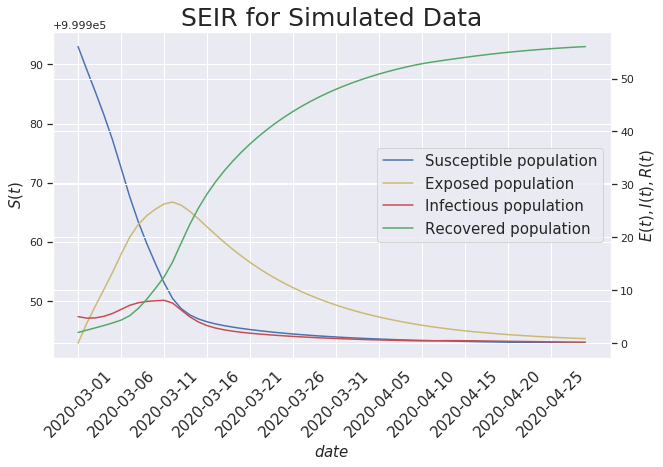

In [10]:
# predicting SEIR values
[S,E,I,R,gamma] = seir_spline_predict(StartDate, EndDate0, EndDate1, Tbreak, ctrBeta, ctrGamma, Nodes, betaNode, gammaNode, N, S0, E0, I0, R0, SPLINE, Sigma, RK)

#plotting SEIR values
seir_plot(S,E,I,R,TimeSeries,title_add=' for Simulated Data', fig_save=1, fig_text='_Simulation')

In [14]:
# plotting model fit and prediction
fig_save = 0
print(I[-1])
print(S0)
if abs(I[-1]) < S0: fig_save = 1
FileOut_name = 'test_'
FileOut_savedir=str(os.getcwd())+'/FIGURES/'
#Coef111 = Coef11 + 0.8 ;  %% we will use these below for the annotation of the Figure
NameState = 'CountryX'
I_predicted = [0 if x < 0 else x for x in I]
TimeSeries = range(StartDate,EndDate1+1)
###### For purpose of creating plot, simulate real I data
I_data = I_predicted[0:len(Dates)]
I_data = [round(x,0) for x in I_data]
#########################################################
div = gamma_plot(I_data,I_predicted,TimeSeries, DaysHistoryFromStart, StartDate, EndDate0, EndDate1, Nodes, Tbreak, SetDates1, coefB, coefBrx, coefG, coefGrx, NameState, FileOut_name, FileOut_savedir, fig_save)


0.17599675243116905
999993
